In [2]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
mpl.__version__

'3.3.2'

In [3]:
plt.style.use(['seaborn-whitegrid'])

## 플롯 종류

| 함수 | 설명 |
|------|------|
| `bar` | 막대 플롯(bar plot) 생성 |
| `barbs` | barbs의 2차원 필드 그리기 |
| `boxplot` | 상자 및 수염 플롯 생성 |
| `cohere` | x와 y의 일관성 시각화 그리기 |
| `contour` | 플롯 등고선 |
| `errorbar` | 오류 막대 그래프 |
| `hexbin` | 육각형 binning 플롯 생성 |
| `hist` | 히스토그램 플롯 |
| `imshow` | 축에 이미지 표시 |
| `pcolor` | 2차원 배열의 유사 플롯 생성 |
| `pcolormesh` | 사각 망사 그래프 |
| `pie` | 파이 차트 플롯 |
| `plot` | 플롯 라인 또는 마커 |
| `quiver` | 화살표의 2차원 필드 생성 |
| `sankey` | Sankey 흐름도 생성 |
| `scatter` | x대 y의 산점도 생성 |
| `stem` | 줄기 그래프 생성 |
| `streamplot` | 벡터 흐름의 스트림 라인 그리기 |

## 레이다 차트(Radar Chart)

* 어떤 측정 목표에 대한 평가항목이 여러 개일 때 항목 수에 따라 원을 같은 간격으로 나누고, 중심으로부터 일정 간격으로 동심으로 척도를 재는 칸을 나누어 각 평가항목의 정량화된 점수에 따라 그 위치에 점을 찍고 평가항목간 점을 이어 선으로 만들어 항목 간 균형을 한눈에 볼 수 있도록 해주는 도표
* 여러 측정 목표를 함께 겹쳐 놓아 비교하기에도 편리
각 항목 간 비율뿐만 아니라 균형과 경향을 직관적으로 알 수 있어 편리

In [4]:
import pandas as pd

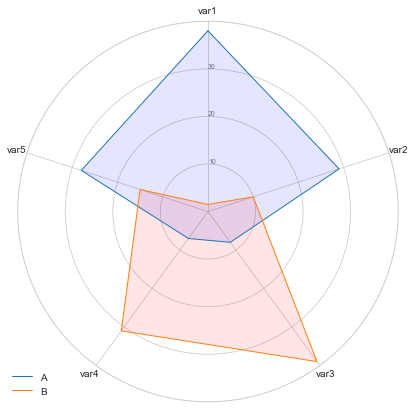

In [5]:
df = pd.DataFrame({
    'group': ['A', 'B', 'C', 'D'],
    'var1': [38, 1.5, 3, 2],
    'var2': [29, 10, 9, 34],
    'var3': [8, 39, 23, 24],
    'var4': [7, 31, 33, 14],
    'var5': [28, 15, 32, 14]
})

categories = list(df)[1:]
N = len(categories)

angles = [n / float(N) * 2 * np.pi for n in range(N)]
angles += angles[:1]

plt.figure(figsize=(12, 7))
ax = plt.subplot(111, polar=True)
ax.set_theta_offset(np.pi / 2)
ax.set_theta_direction(-1)
ax.set_rlabel_position(0)
plt.xticks(angles[:-1], categories)
plt.yticks([10, 20, 30], ["10", "20", "30"], color='gray', size=7)
plt.ylim(0, 40)

values = df.loc[0].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label='A')
ax.fill(angles, values, 'b', alpha=0.1)

values = df.loc[1].drop('group').values.flatten().tolist()
values += values[:1]
ax.plot(angles, values, linewidth=1, linestyle='solid', label='B')
ax.fill(angles, values, 'r', alpha=0.1)

plt.legend(bbox_to_anchor=(0.1, 0.1), loc='best');



## 생키 다이어그램(Sankey Diagram)

* 흐름(Flow) 다이어그램의 한 종류로서 그 화살표의 너비로 흐름의 양을 비율적으로 보여줌

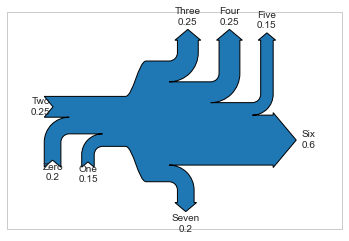

In [6]:
from matplotlib.sankey import Sankey

Sankey(flows=[0.20, 0.15, 0.25, -0.25, -0.25, -0.15, -0.60, -0.20],
       labels=['Zero', 'One', 'Two', 'Three', 'Four', 'Five', 'Six', 'Seven'],
       orientations=[-1, -1, 0, 1, 1, 1, 0, -1]).finish();

참고문헌

* Matplotlib, https://matplotlib.org/
* Igor Milovanovi, "Python Data Visualization Cookbook", Packt
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Wes Mckinney, "Python for Data Analysis", O'Reilly